In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Data

In the provided Kaggle Dataset we have been provided with 6 different files for training,So we shall load each file and analysis the data individually

**1.gender_age_train file**

In [2]:
gender_age_train = pd.read_csv('C:\\Users\\user\\Downloads\\talkingdata-mobile-user-demographic\\gender_age_train.csv')
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [3]:
gender_age_train.shape

(74645, 4)

In [4]:
#Checking if any of the columns contains Nan Values
gender_age_train.isnull().any()

device_id    False
gender       False
age          False
group        False
dtype: bool

Plot reperesenting  how many users does each group contain


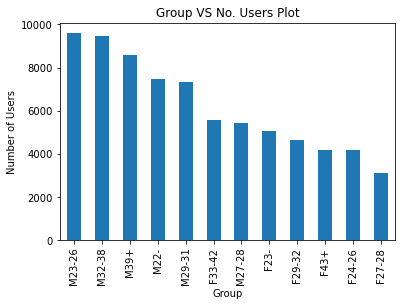

Total number of Users: 74645
Number of groups= 12
Number of Male Users: 47904 -->64.2% 
Number of Female Users: 26741 -->35.8%


In [5]:
print('Plot reperesenting  how many users does each group contain')
plt.title('Group VS No. Users Plot')
plt.xlabel('Group')
plt.ylabel('Number of Users')
gender_age_train['group'].value_counts().plot.bar()
plt.show()
print('Total number of Users:',len(gender_age_train))
print('Number of groups=',len(gender_age_train['group'].unique()) )

print('Number of Male Users:',gender_age_train['gender'].value_counts()[0],'-->64.2%','\nNumber of Female Users:',gender_age_train['gender'].value_counts()[1],'-->35.8%')

**2.phone_brand_device_model file**

This file is like the database which  contains phone brand and its model name for all the devices(device_ids) mentioned in train and test dataset.

In [6]:
phone_brand_device_model = pd.read_csv('C:\\Users\\user\\Downloads\\talkingdata-mobile-user-demographic\\phone_brand_device_model.csv')
#removing duplicates
phone_brand_device_model=phone_brand_device_model.drop_duplicates()
phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [7]:
#Phone Brand names are in chinese  so converting them to English 
#https://www.kaggle.com/iuga77/translate-brand-names-snippet
English_phone_brands = {"三星": "samsung", "天语": "Ktouch","海信": "hisense", "联想": "lenovo",   "欧比": "obi",    "爱派尔": "ipair",  
"努比亚": "nubia",  "优米": "youmi","朵唯": "dowe", "黑米": "heymi","锤子": "hammer","酷比魔方": "koobee","美图": "meitu","尼比鲁": "nibilu",
    "一加": "oneplus","优购": "yougo","诺基亚": "nokia", "糖葫芦": "candy","中国移动": "ccmc", "语信": "yuxin","基伍": "kiwu","青橙": "greeno",
    "华硕": "asus", "夏新": "panosonic", "维图": "weitu","艾优尼": "aiyouni","摩托罗拉": "moto", "乡米": "xiangmi", "米奇": "micky",
    "大可乐": "bigcola", "沃普丰": "wpf", "神舟": "hasse",  "摩乐": "mole","飞秒": "fs","米歌": "mige", "富可视": "fks", "德赛": "desci",
    "梦米": "mengmi","乐视": "lshi","小杨树": "smallt","纽曼": "newman", "邦华": "banghua", "E派": "epai", "易派": "epai", "普耐尔": "pner",
    "欧新": "ouxin",   "西米": "ximi",  "海尔": "haier",  "波导": "bodao", "糯米": "nuomi", "唯米": "weimi", "酷珀": "kupo",  "谷歌": "google",
    "昂达": "ada" ,    "聆韵": "lingyun",  "小米": "Xiaomi", "华为": "Huawei", "魅族": "Meizu", "中兴": "ZTE",   "酷派": "Coolpad",    "金立": "Gionee",
    "SUGAR": "SUGAR",   "OPPO": "OPPO",   "vivo": "vivo",  "HTC": "HTC",   "LG": "LG", "ZUK": "ZUK",   "TCL": "TCL", "LOGO": "LOGO","Lovme": "Lovme",
    "PPTV": "PPTV", "ZOYE": "ZOYE", "MIL": "MIL",   "索尼" : "Sony","欧博信" : "Opssom",  "奇酷" : "Qiku","酷比" : "CUBE", "康佳" : "Konka",
    "亿通" : "Yitong",   "金星数码" : "JXD","至尊宝" : "Monkey King", "百立丰" : "Hundred Li Feng","贝尔丰" : "Bifer","百加" : "Bacardi", "诺亚信" : "Noain",
    "广信" : "Kingsun",  "世纪天元" : "Ctyon", "青葱" : "Cong", "果米" : "Taobao","斐讯" : "Phicomm", "长虹" : "Changhong", "欧奇" : "Oukimobile",
      "先锋" : "XFPLAY","台电" : "Teclast","大Q" : "Daq","蓝魔" : "Ramos", "奥克斯" : "AUX"
}

phone_brand_device_model.phone_brand = phone_brand_device_model.phone_brand.map(pd.Series(English_phone_brands), na_action='ignore')


In [8]:
gender_age_train.set_index('device_id')
phone_brand_device_model.set_index('device_id')
gender_mobile_data = pd.merge(left=gender_age_train, right=phone_brand_device_model, left_on='device_id', right_on='device_id')
gender_mobile_data.head()

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,Xiaomi,MI 2
1,-2897161552818060146,M,35,M32-38,Xiaomi,MI 2
2,-8260683887967679142,M,35,M32-38,Xiaomi,MI 2
3,-4938849341048082022,M,30,M29-31,Xiaomi,红米note
4,245133531816851882,M,30,M29-31,Xiaomi,MI 3


In [9]:
print(len(gender_mobile_data.phone_brand.unique()), 'unique brands of mobile devices are used by the Users')

97 unique brands of mobile devices are used by the Users


In [10]:
#Picking up top ten models and top ten phone brands for EDA purpose .
Top_Ten_Brands=gender_mobile_data['phone_brand'].value_counts()[0:10]
Top_Ten_Brands=Top_Ten_Brands.to_dict()

Top_Ten_Phone_Models=gender_mobile_data['device_model'].value_counts()[0:15]
Top_Ten_Phone_Models=Top_Ten_Phone_Models.to_dict()

<AxesSubplot:xlabel='phone_brand', ylabel='age'>

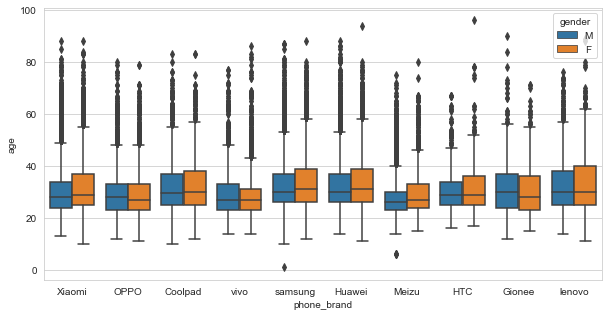

In [11]:
#Boxplot between Phone Brands & Age:
gender_mobile_data1=gender_mobile_data.loc[gender_mobile_data['phone_brand'].isin(Top_Ten_Brands.keys())]
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x = 'phone_brand', y = 'age',hue='gender' ,data = gender_mobile_data1)

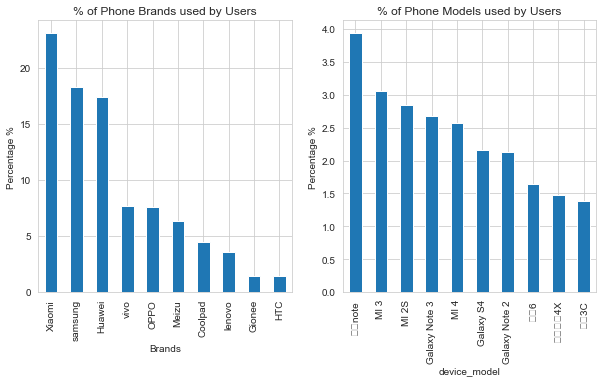

In [12]:
#Plotting the distribution of Phone Brand and the Phone Models across the % of Users
plt.figure(figsize=(10,5))
plt.subplot(1, 2,1)
(phone_brand_device_model['phone_brand'].value_counts()[0:10]/len(phone_brand_device_model)*100).plot.bar()
plt.title('% of Phone Brands used by Users')
plt.xlabel('Brands')
plt.ylabel('Percentage %')

#******************************************#

plt.subplot(1, 2,2)
(phone_brand_device_model['device_model'].value_counts()[0:10]/len(phone_brand_device_model)*100).plot.bar()
plt.title('% of Phone Models used by Users')
plt.xlabel('device_model')
plt.ylabel('Percentage %')
plt.show()

**3.Events Data**

In [13]:
events_data = pd.read_csv('C:\\Users\\user\\Downloads\\talkingdata-mobile-user-demographic\\events.csv')
events_data.set_index('device_id')
events_data=events_data.drop_duplicates()
events_data.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [14]:
#loading and mapping with device Ids in train data
gender_data_event = pd.merge(left=gender_mobile_data, right=events_data, left_on='device_id', right_on='device_id')
gender_data_event.head()

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude
0,-8260683887967679142,M,35,M32-38,Xiaomi,MI 2,2479656,2016-05-01 14:23:37,0.00,0.00
1,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,280934,2016-05-04 14:10:03,119.57,31.75
2,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,363585,2016-05-04 14:13:30,119.57,31.75
3,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,935225,2016-05-06 18:51:15,0.00,0.00
4,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,1551108,2016-05-04 14:09:29,119.57,31.75


In [15]:
gender_data_event.shape

(1215616, 10)

In [16]:
print('Devices with Events Data:',len(gender_data_event['device_id'].unique()),'which is ',round(((len(gender_data_event['device_id'].unique())/len(gender_age_train))*100),2),'percentage of overall training data')

Devices with Events Data: 23309 which is  31.23 percentage of overall training data


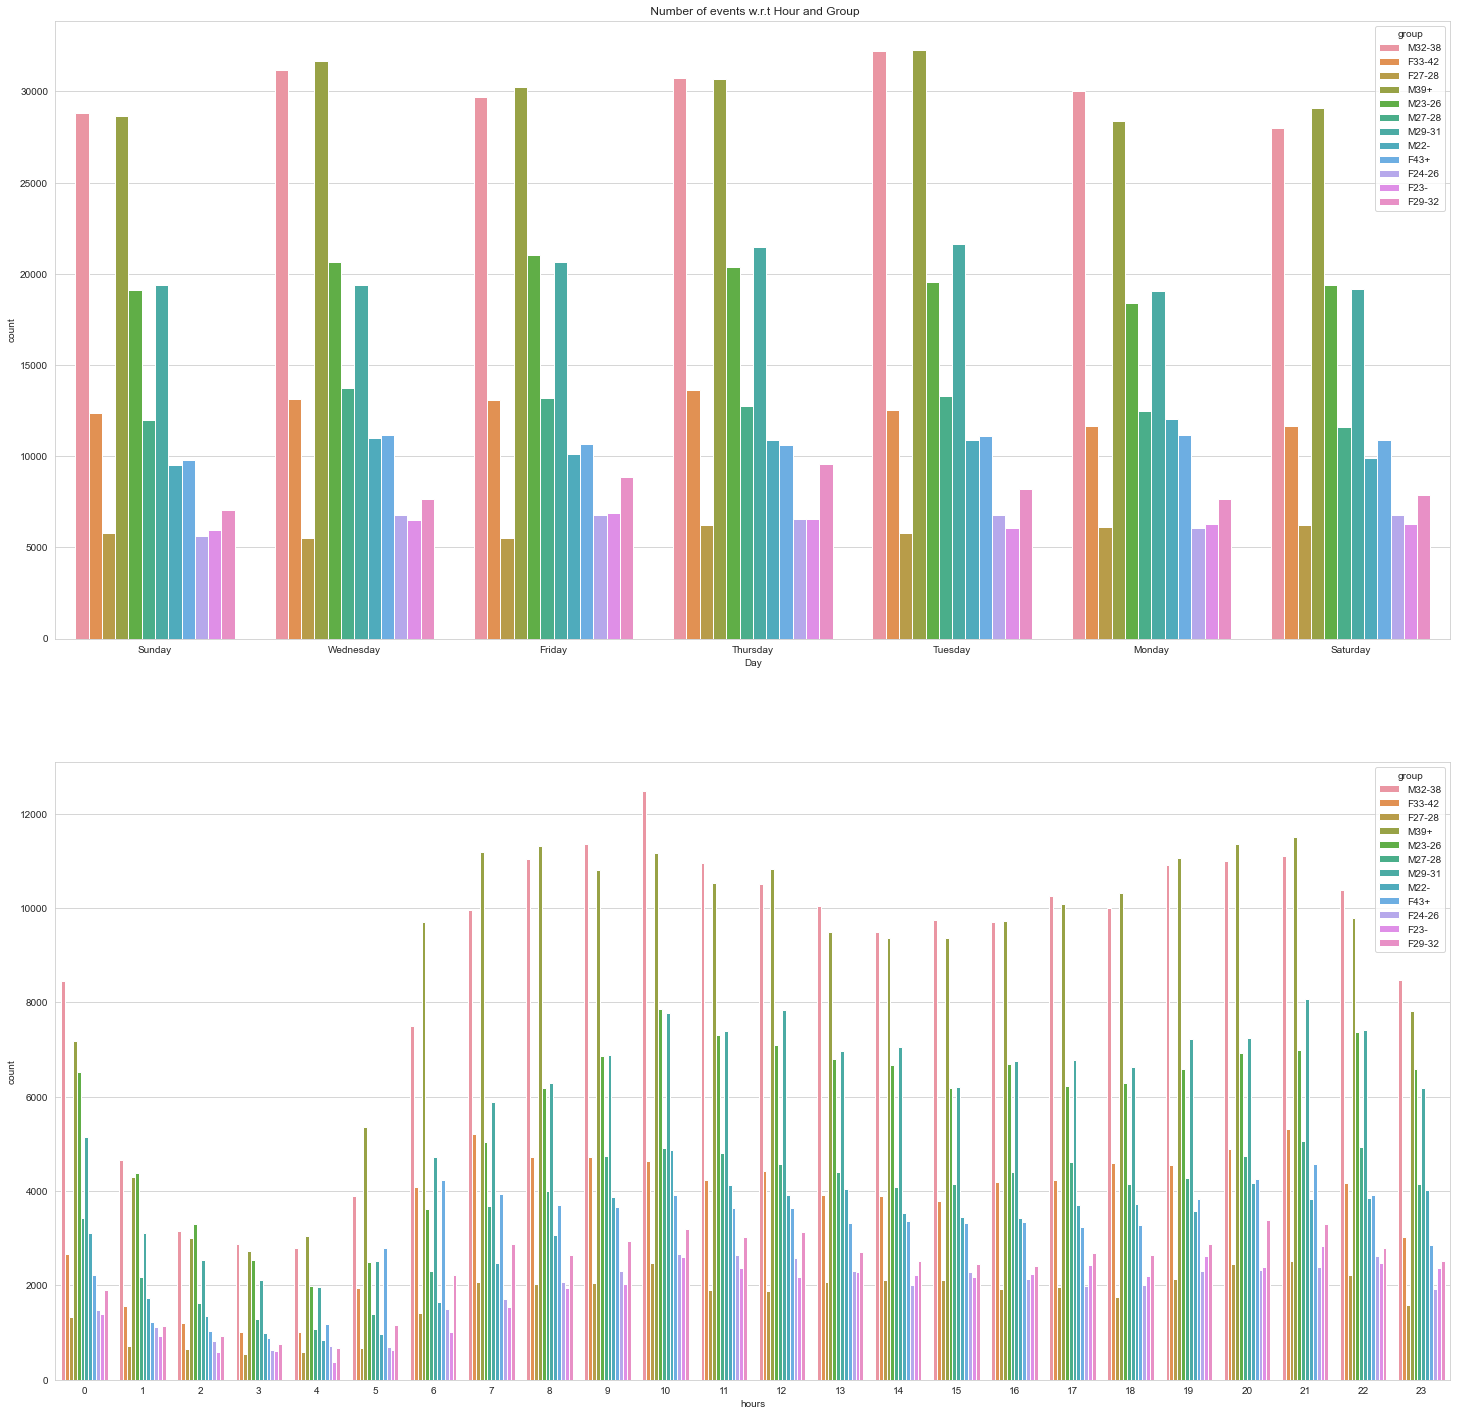

In [17]:
import calendar
from matplotlib.pyplot import figure
plt.figure(figsize=(25,25))
#Distribution of events w.r.t Day and Group
plt.title(' Number of events w.r.t Day and Group')
plt.subplot(2, 1,1)
gender_data_event['timestamp']=pd.to_datetime(gender_data_event.timestamp)
gender_data_event['Day'] = gender_data_event.timestamp.dt.day_name()
sns.countplot(x="Day",hue="group", data=gender_data_event)

#Distribution of events w.r.t Hour and Group
plt.title(' Number of events w.r.t Hour and Group')
plt.subplot(2, 1,2)
gender_data_event['hours'] = gender_data_event['timestamp'].apply(lambda x: x.hour)
sns.countplot(x='hours',hue='group' ,data=gender_data_event)
plt.show()

In [24]:
gender_data_event['dayofyear']= gender_data_event['timestamp'].apply(lambda x: x.dayofyear)

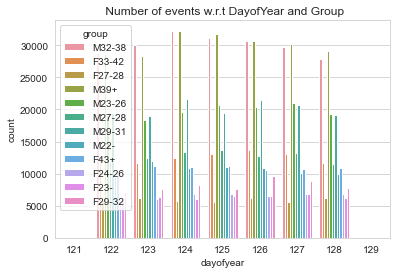

Event data is provide from starting  2016-04-30 23:52:24  to  2016-05-08 00:00:08


In [25]:
#Distribution of events w.r.t DayofYear and Group
plt.title(' Number of events w.r.t DayofYear and Group')
sns.countplot(x='dayofyear',hue='group' ,data=gender_data_event)
plt.show()
print('Event data is provide from starting ' ,gender_data_event ['timestamp'].min(),' to ',gender_data_event ['timestamp'].max())

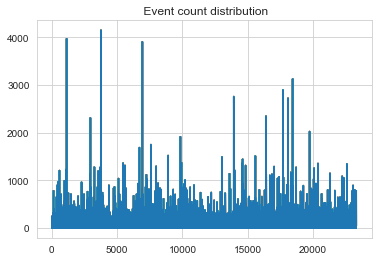

event count:  71.0  Percentile:  81
event count:  75.0  Percentile:  82
event count:  80.0  Percentile:  83
event count:  86.0  Percentile:  84
event count:  91.0  Percentile:  85
event count:  97.0  Percentile:  86
event count:  104.0  Percentile:  87
event count:  111.0  Percentile:  88
event count:  120.0  Percentile:  89
event count:  131.0  Percentile:  90
event count:  143.0  Percentile:  91
event count:  156.0  Percentile:  92
event count:  172.0  Percentile:  93
event count:  190.0  Percentile:  94
event count:  215.0  Percentile:  95
event count:  248.0  Percentile:  96
event count:  293.0  Percentile:  97
event count:  374.0  Percentile:  98
event count:  517.0  Percentile:  99
event count:  4150.0  Percentile:  100


In [23]:
event_counts=gender_data_event.groupby(gender_data_event['device_id']).count().values
plt.title(' Event count distribution')
p = np.arange(1, len(event_counts)+1)
plt.plot(p,event_counts) 
plt.show()
for i in range(20):
    print('event count: ',np.percentile(event_counts,(i+81)),' Percentile: ',(i+81))

In [297]:
print('Total Number of events logged:',len(gender_data_event))

Total Number of events logged: 1215616


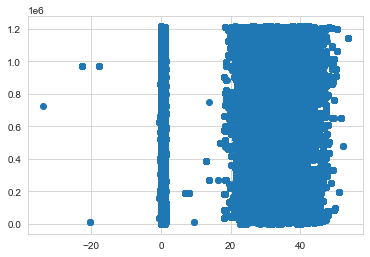

In [308]:
kp = np.arange(1, len(gender_data_event)+1)
lk=gender_data_event['latitude'].values
plt.scatter(lk,kp) 
plt.show()

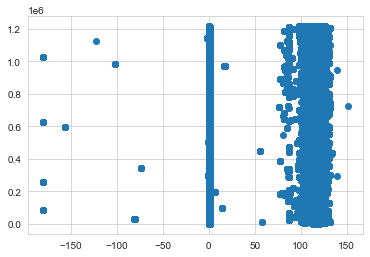

In [317]:
kp = np.arange(1, len(gender_data_event)+1)
lk=gender_data_event['longitude'].values
plt.scatter(lk,kp) 
plt.show()

In [316]:
#gender_data_event['latitude'].loc[gender_data_event['latitude']<2]
#gender_data_event['latitude'].value_counts()

In [294]:
count_0=len(gender_data_event.loc[gender_data_event['latitude']==0.00].loc[gender_data_event['longitude']==0.00])
per=round((count_0/len(gender_data_event)*100),2)
print('Number of 0.00 0.00 locations :',count_0,per,'percenatge of total values')

Number of 0.00 0.00 locations : 356175 29.3 percenatge of total values


In [289]:
print('Number of 1.00 1.00 locations :',len(gender_data_event.loc[gender_data_event['latitude']==1.00].loc[gender_data_event['longitude']==1.00]))

Number of 1.00 1.00 locations : 28616


# 4.Label_categories file

In [242]:
label_categories = pd.read_csv('C:\\Users\\user\\Downloads\\talkingdata-mobile-user-demographic\\label_categories.csv')
label_categories=label_categories.drop_duplicates()
label_categories.head()

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


In [246]:
label_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 929
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label_id  930 non-null    int64 
 1   category  927 non-null    object
dtypes: int64(1), object(1)
memory usage: 21.8+ KB


In [243]:
print('Number of Categories:',len(label_categories['category'].unique()))
print('Number of Label_IDs:',len(label_categories['label_id'].unique()))

Number of Categories: 836
Number of Label_IDs: 930


**5.App Labels Data**

In [249]:
apps_label_data = pd.read_csv('C:\\Users\\user\\Downloads\\talkingdata-mobile-user-demographic\\app_labels.csv')
apps_label_data=apps_label_data.drop_duplicates()
apps_label_data.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [245]:
#Attaching category data to applabel_data file
apps_category=pd.merge(apps_label_data,label_categories,on='label_id',how='left')
apps_category=apps_category.drop(['label_id'], axis='columns')
apps_category.head()

,app_id,category
0,7324884708820027918,Finance
1,-4494216993218550286,Finance
2,6058196446775239644,unknown
3,6058196446775239644,DS_P2P net loan
4,8694625920731541625,unknown


In [248]:
apps_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459452 entries, 0 to 459451
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   app_id    459452 non-null  int64 
 1   category  459452 non-null  object
dtypes: int64(1), object(1)
memory usage: 10.5+ MB


In [251]:
print('Total Number of Apps:',len(apps_category) ,'with Total number of categories: ',len(apps_category['category'].unique()))

Total Number of Apps: 459452 with total number of categories:  473


**6.App Events Data**

In [252]:
apps_events_data = pd.read_csv('C:\\Users\\user\\Downloads\\talkingdata-mobile-user-demographic\\app_events.csv')
apps_events_data.head()


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [254]:
apps_events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32473067 entries, 0 to 32473066
Data columns (total 4 columns):
 #   Column        Dtype
---  ------        -----
 0   event_id      int64
 1   app_id        int64
 2   is_installed  int64
 3   is_active     int64
dtypes: int64(4)
memory usage: 991.0 MB


In [257]:
apps_events_data['is_installed'].value_counts()

1    32473067
Name: is_installed, dtype: int64

In [299]:
apps_events_data['is_active'].value_counts()

0    19740071
1    12732996
Name: is_active, dtype: int64

In [302]:
round((apps_events_data['is_active'].value_counts()[0]/len(apps_events_data))*100,2)

60.79

In [263]:
print('Number of 0.00 0.00 locations :',len(events_data.loc[events_data['latitude']==0.00].loc[events_data['longitude']==0.00]))

Number of 0.00 0.00 locations : 968675


# **Overall Observations**:

In [4]:

# Bag of apps categories
# Bag of labels categories
# Include phone brand and model device

print("Initialize libraries")

import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import log_loss
from sklearn.cluster import DBSCAN
from sklearn import metrics as skmetrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter
from keras.layers.advanced_activations import PReLU
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import ensemble
from sklearn.decomposition import PCA
import os
import gc
from scipy import sparse
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectKBest
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

#------------------------------------------------- Write functions ----------------------------------------

def rstr(df): return df.dtypes, df.head(3) ,df.apply(lambda x: [x.unique()]), df.apply(lambda x: [len(x.unique())]),df.shape

def batch_generator(X, y, batch_size, shuffle):
    #chenglong code for fiting from generator (https://www.kaggle.com/c/talkingdata-mobile-user-demographics/forums/t/22567/neural-network-for-sparse-matrices)
    number_of_batches = np.ceil(X.shape[0]/batch_size)
    counter = 0
    sample_index = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(sample_index)
    while True:
        batch_index = sample_index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X[batch_index,:].toarray()
        y_batch = y[batch_index]
        counter += 1
        yield X_batch, y_batch
        if (counter == number_of_batches):
            if shuffle:
                np.random.shuffle(sample_index)
            counter = 0

def batch_generatorp(X, batch_size, shuffle):
    number_of_batches = X.shape[0] / np.ceil(X.shape[0]/batch_size)
    counter = 0
    sample_index = np.arange(X.shape[0])
    while True:
        batch_index = sample_index[batch_size * counter:batch_size * (counter + 1)]
        X_batch = X[batch_index, :].toarray()
        counter += 1
        yield X_batch
        if (counter == number_of_batches):
            counter = 0

#------------------------------------------------ Read data from source files ------------------------------------

seed = 700
np.random.seed(seed)
datadir='C:\\Users\\user\\Downloads\\talkingdata-mobile-user-demographic\\'
print("# Read app events")
app_events = pd.read_csv(os.path.join(datadir,'app_events.csv'), dtype={'device_id' : np.str})

print("### ----- PART 1 ----- ###")

# Data - Events data
# Bag of apps
print("# Read app events")
app_events = pd.read_csv(os.path.join(datadir,'app_events.csv'), dtype={'device_id' : np.str})
#app_events.head(5)
#app_events.info()
#print(rstr(app_events))

# remove duplicates(app_id)
app_events= app_events.groupby("event_id")["app_id"].apply(
    lambda x: " ".join(set("app_id:" + str(s) for s in x)))
#app_events.head(5)

print("# Read Events")
events = pd.read_csv(os.path.join(datadir,'events.csv'), dtype={'device_id': np.str})
#events.head(5)
events["app_id"] = events["event_id"].map(app_events)
events = events.dropna()
del app_events

events = events[["device_id", "app_id"]]
#events.info()
# 1Gb reduced to 34 Mb

# remove duplicates(app_id)
events.loc[:,"device_id"].value_counts(ascending=True)

events = events.groupby("device_id")["app_id"].apply(
    lambda x: " ".join(set(str(" ".join(str(s) for s in x)).split(" "))))
events = events.reset_index(name="app_id")

# expand to multiple rows
events = pd.concat([pd.Series(row['device_id'], row['app_id'].split(' '))
                    for _, row in events.iterrows()]).reset_index()
events.columns = ['app_id', 'device_id']
#events.head(5)
f3 = events[["device_id", "app_id"]]    # app_id

print("#Part1 formed")

##################
#   App labels
##################

print("### ----- PART 2 ----- ###")

print("# Read App labels")
app_labels = pd.read_csv(os.path.join(datadir,'app_labels.csv'))
label_cat = pd.read_csv(os.path.join(datadir,'label_categories.csv'))
#app_labels.info()
#label_cat.info()
label_cat=label_cat[['label_id','category']]

app_labels=app_labels.merge(label_cat,on='label_id',how='left')
#app_labels.head(3)
#events.head(3)
#app_labels = app_labels.loc[app_labels.smaller_cat != "unknown_unknown"]

#app_labels = app_labels.groupby("app_id")["category"].apply(
#    lambda x: ";".join(set("app_cat:" + str(s) for s in x)))
app_labels = app_labels.groupby(["app_id","category"]).agg('size').reset_index()
app_labels = app_labels[['app_id','category']]
print("# App labels done")


# Remove "app_id:" from column
print("## Handling events data for merging with app lables")
events['app_id'] = events['app_id'].map(lambda x : x.lstrip('app_id:'))
events['app_id'] = events['app_id'].astype(str)
app_labels['app_id'] = app_labels['app_id'].astype(str)
#app_labels.info()

print("## Merge")

events= pd.merge(events, app_labels, on = 'app_id',how='left').astype(str)
#events['smaller_cat'].unique()

# expand to multiple rows
print("#Expand to multiple rows")
#events= pd.concat([pd.Series(row['device_id'], row['category'].split(';'))
#                    for _, row in events.iterrows()]).reset_index()
#events.columns = ['app_cat', 'device_id']
#events.head(5)
#print(events.info())

events= events.groupby(["device_id","category"]).agg('size').reset_index()
events= events[['device_id','category']]
#events.head(10)
print("# App labels done")

f5 = events[["device_id", "category"]]    # app_id
# Can % total share be included as well?
print("# App category part formed")

##################
#   Phone Brand
##################
print("### ----- PART 3 ----- ###")

print("# Read Phone Brand")
pbd = pd.read_csv(os.path.join(datadir,'phone_brand_device_model.csv'),
                  dtype={'device_id': np.str})
pbd.drop_duplicates('device_id', keep='first', inplace=True)

##################
#  Train and Test
##################
print("# Generate Train and Test")

train = pd.read_csv(os.path.join(datadir,'gender_age_train.csv'),
                    dtype={'device_id': np.str})
train['dl'] = pd.Series(train.index/len(train.index),index=train.index)
                    
train.drop(["age", "gender"], axis=1, inplace=True)
train.info()
test = pd.read_csv(os.path.join(datadir,'gender_age_test.csv'),
                   dtype={'device_id': np.str})
test['dl'] = pd.Series(test.index/len(test.index),index=test.index)
                   
test["group"] = np.nan
test.info()
split_len = len(train)

# Group Labels
Y = train["group"]
lable_group = LabelEncoder()
Y = lable_group.fit_transform(Y)
device_id = test["device_id"]

# Concat
Df = pd.concat((train, test), axis=0, ignore_index=True)

print("### ----- PART 4 ----- ###")

Df = pd.merge(Df, pbd, how="left", on="device_id")
Df["phone_brand"] = Df["phone_brand"].apply(lambda x: "phone_brand:" + str(x))
Df["device_model"] = Df["device_model"].apply(
    lambda x: "device_model:" + str(x))


###################
#  Concat Feature
###################

print("# Concat all features")

f1 = Df[["device_id", "phone_brand"]]   # phone_brand
f2 = Df[["device_id", "device_model"]]  # device_model
f6 = Df[["device_id", "dl"]]  # 

events = None
Df = None

f1.columns.values[1] = "feature"
f2.columns.values[1] = "feature"
f5.columns.values[1] = "feature"
f3.columns.values[1] = "feature"
f6.columns.values[1] = "dl"

FLS = pd.concat((f1, f2, f3, f5), axis=0, ignore_index=True)
print(FLS.head(10))
print(f1.head(10))
print(f2.head(10))
print(f3.head(10))
print(f5.head(10))
print(f6.head(10))
FLS.info()
FLS6 = pd.concat((f1, f2, f3, f5,f6), axis=0, ignore_index=True)
FLS6.info()
print(FLS6.head(10))
###################
# User-Item Feature
###################
print("# User-Item-Feature")

device_ids = FLS6["device_id"].unique()
feature_cs = FLS["feature"].unique()
moo = f6["dl"]

data = np.hstack((np.ones(len(FLS)),moo.data)) # numpy ndarray
print(len(data))

dec = LabelEncoder().fit(FLS6["device_id"])
row = dec.transform(FLS6["device_id"])
col = np.hstack((LabelEncoder().fit_transform(FLS["feature"])+1,np.ones(len(moo))))
sparse_matrix = sparse.csr_matrix(
    (data, (row, col)), shape=(len(device_ids), len(feature_cs)+1))
print(sparse_matrix.shape)
sys.getsizeof(sparse_matrix)

sparse_matrix = sparse_matrix[:, sparse_matrix.getnnz(0) > 0]
print("# Sparse matrix done")

del FLS
del data
f1 = [1]
f5 = [1]
f2 = [1]
f3 = [1]

events = [1]

##################
#      Data
##################

print("# Split data")
train_row = dec.transform(train["device_id"])
train_sp = sparse_matrix[train_row, :]

test_row = dec.transform(test["device_id"])
test_sp = sparse_matrix[test_row, :]

X_train, X_val, y_train, y_val = train_test_split(
    train_sp, Y, train_size=0.999, random_state=10)

##################
#   Feature Sel
##################
print("# Feature Selection")
#selector = SelectPercentile(f_classif, percentile=53)

#selector.fit(X_train, y_train)
#X_train.shape
#X_train = selector.transform(X_train)
#X_train.shape
#X_val = selector.transform(X_val)
#X_val.shape

# Selection using chi-square
# selector = SelectKBest(chi2, k=11155).fit(X_train, y_train)
# X_train.shape
# X_train = selector.transform(X_train)
# X_train.shape
# X_val = selector.transform(X_val)
# X_val.shape

print("# Num of Features: ", X_train.shape[1])

##################
#  Build Model
##################


#act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(150, input_dim=X_train.shape[1], init='normal'))
    model.add(PReLU())
    model.add(Dropout(0.4))
    model.add(Dense(50, input_dim=X_train.shape[1], init='normal'))
    model.add(PReLU())
    model.add(Dropout(0.2))
    model.add(Dense(12, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])  #logloss
    return model

model=baseline_model()

fit= model.fit_generator(generator=batch_generator(X_train, y_train, 400, True),
                         nb_epoch=16,
                         samples_per_epoch=69984,
                         validation_data=(X_val.todense(), y_val), verbose=2
                         )

# evaluate the model
scores_val = model.predict_generator(generator=batch_generatorp(X_val, 400, False), val_samples=X_val.shape[0])
print('logloss val {}'.format(log_loss(y_val, scores_val)))

print("# Final prediction")
scores = model.predict_generator(generator=batch_generatorp(test_sp, 800, False), val_samples=test_sp.shape[0])
result = pd.DataFrame(scores , columns=lable_group.classes_)
result["device_id"] = device_id
print(result.head(1))
result = result.set_index("device_id")

#result.to_csv('./sub_bagofapps7_keras_10_50_pt2_10epoch.csv', index=True, index_label='device_id')
#Drop out 0.2
#Validation 2.3017
result.to_csv('sub_bagofapps7_keras_150_pt4_50_pt2_15epoch_prelu_softmax.csv', index=True, index_label='device_id')


print("Done")

Initialize libraries
# Read app events
### ----- PART 1 ----- ###
# Read app events
# Read Events
#Part1 formed
### ----- PART 2 ----- ###
# Read App labels
# App labels done
## Handling events data for merging with app lables
## Merge
#Expand to multiple rows
# App labels done
# App category part formed
### ----- PART 3 ----- ###
# Read Phone Brand
# Generate Train and Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   device_id  74645 non-null  object 
 1   group      74645 non-null  object 
 2   dl         74645 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112071 entries, 0 to 112070
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   device_id  112071 non-null  object 
 1   dl         112071 non-nu

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-ab7e01386e77>", line 268, in <module>
    data = np.hstack((np.ones(len(FLS)),moo.data)) # numpy ndarray
  File "C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py", line 5487, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'Series' object has no attribute 'data'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\user\Anaconda3

AttributeError: 'Series' object has no attribute 'data'